# Point in Polygon
## Damien Allison, Drew Mattson, Caleb Andreano

Basic algorithm: 
- Figure out the corner points of the box than bounds the polygon. If the target point is out of this box, we know it's not
  inside. Otherwise, continue.
- Next, we're going to find the equation of the line horizontally to the x axis.
- For each pair of vertices:
    - if both points are above the line or if they're both below the line, we know that we don't have an intersection. Skip
    - Otherwise, there will be exactly one intersection between the two vertices. If that intersection is within the bounding box, we increment
      a counter representing the number of intersections. 


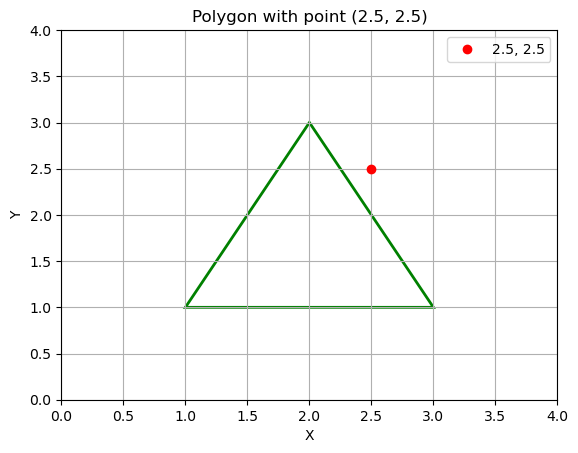

False


In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def point_inside_polygon(x, y, poly):

    # throw out point immediately
    
    
    n = len(poly) # n = number of vertices
    inside = False
    p1x, p1y = poly[0]             # poly is an array of tuples, representing (x, y) points
    for i in range(n + 1):         # number of pairs + (last, first)
        p2x, p2y = poly[i % n]     # p2 will be poly[0] when i = len
        if y > min(p1y, p2y) and y <= max(p1y, p2y):      # if we're in the y bound   
           if x <= max(p1x, p2x):                         # if we're between x = 0 and the maximum x bound
                if p1y != p2y:                            # otherwise, we have a line with the same height, not going to intersect
                    xinters = (y - p1y)*(p2x - p1x) / (p2y - p1y) + p1x  # x intercept = this equation
                    if p1x == p2x or x <= xinters:        
                        inside = not inside
        p1x, p1y = p2x, p2y
        
    fig, ax = plt.subplots()
    ax.set_xlim(min(poly, key=lambda p: p[0])[0]-1, max(poly, key=lambda p: p[0])[0]+1)
    ax.set_ylim(min(poly, key=lambda p: p[1])[1]-1, max(poly, key=lambda p: p[1])[1]+1)
    ax.add_patch(Polygon(poly, closed=True, fill=False, color='g', linewidth=2))
    plt.plot(x, y, 'ro', label=f'{x}, {y}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polygon with point ({x}, {y})')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return inside

polygon = [(1, 1), (2, 3), (3, 1)]
point = (2.5, 2.5)
print(point_inside_polygon(point[0], point[1], polygon))  # inside: True


Test Case 1:


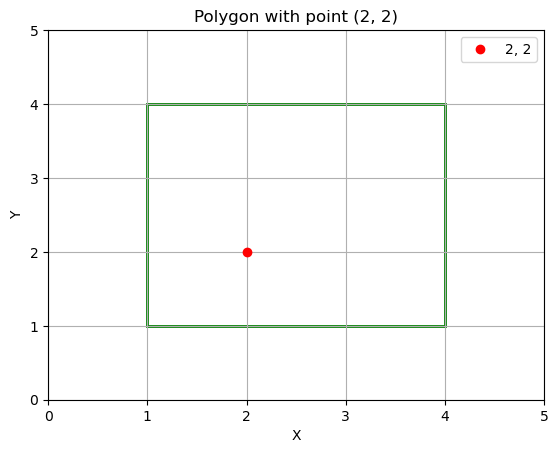

Point inside polygon: True

Test Case 2:


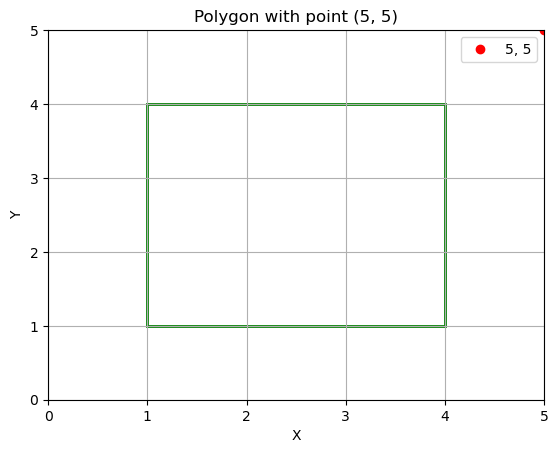

Point outside polygon: False

Test Case 3:


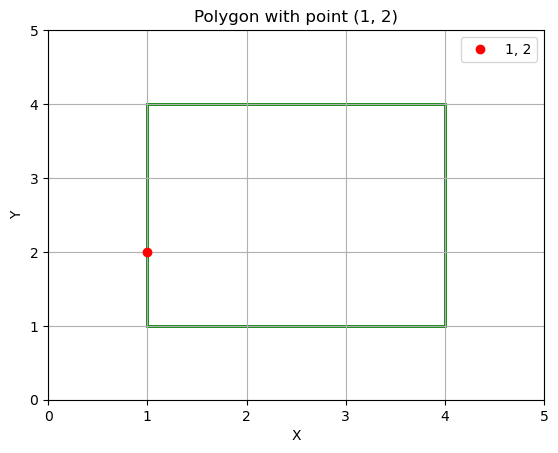

Point on the boundary of the polygon: False

Test Case 4:


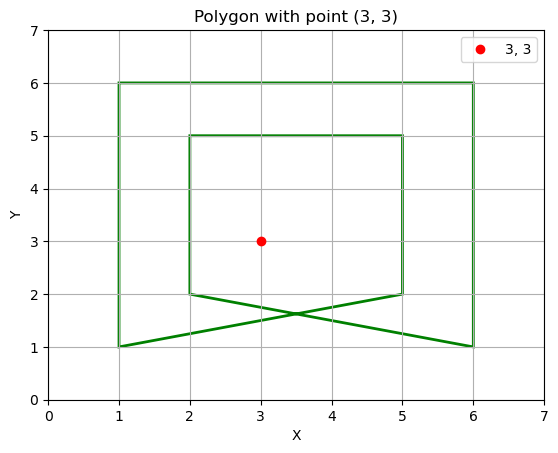

Point inside polygon with a hole: False


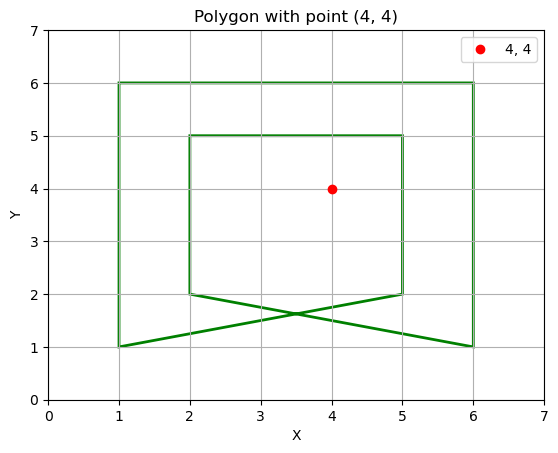

Point outside polygon with a hole: False


In [12]:
# Test Case 1: Point inside the polygon
polygon1 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point1 = (2, 2)

# Test Case 2: Point outside the polygon
polygon2 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point2 = (5, 5)

# Test Case 3: Point on the boundary of the polygon
polygon3 = [(1, 1), (1, 4), (4, 4), (4, 1)]
point3 = (1, 2)

# Test Case 4: Complex polygon with a hole
polygon4 = [(1, 1), (1, 6), (6, 6), (6, 1)]
hole = [(2, 2), (2, 5), (5, 5), (5, 2)]
point4_inside = (3, 3)
point4_outside = (4, 4)



print("Test Case 1:")
print("Point inside polygon:", point_inside_polygon(point1[0], point1[1], polygon1))
print("\nTest Case 2:")
print("Point outside polygon:", point_inside_polygon(point2[0], point2[1], polygon2))
print("\nTest Case 3:")
print("Point on the boundary of the polygon:", point_inside_polygon(point3[0], point3[1], polygon3))
print("\nTest Case 4:")
print("Point inside polygon with a hole:", point_inside_polygon(point4_inside[0], point4_inside[1], polygon4 + hole))
print("Point outside polygon with a hole:", point_inside_polygon(point4_outside[0], point4_outside[1], polygon4 + hole))